# INF-0619 - Trabalho Final
### Tema:
* Análise da Gravidade de Artrose no Joelho

### Grupo:
* Elcio
* Hamilton
* Mauricio
* Renato
* Tomais

## Instruções
#### Baixar o dataset https://drive.google.com/drive/folders/16kCVi1XH165MrqdV1PawyDfYvxSOVjio?usp=sharing
#### Descompactar o arquivo baixado no mesmo diretório deste jupyter notebook

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_path= 'dataset'+ os.sep + 'train'
val_path= 'dataset'+ os.sep + 'val'
test_path= 'dataset'+ os.sep + 'test'

In [3]:
def findClassName (row):   
    if row['ClassId'] == 0 :
        return 'Saudavel'
    if row['ClassId'] == 1 :
        return 'Duvidoso'
    if row['ClassId'] == 2 :
        return 'Minimo'
    if row['ClassId'] == 3 :
        return 'Moderado'
    if row['ClassId'] == 4 :
        return 'Severo'

## Análise Training Set

In [4]:
train_image_names = glob.glob(train_path + '/*/*.png')
print("Total number of training images: ", len(train_image_names))
train_image_names = pd.Series(train_image_names)

# train_df: a dataframe with 2 field: Filename, ClassId
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split(os.sep)[-1])

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

train_df['ClassName'] = train_df.apply(lambda row: findClassName(row), axis=1)

train_df.groupby('ClassName').count()

Total number of training images:  5781


,Filename,ClassId
ClassName,,
Duvidoso,1046,1046
Minimo,1516,1516
Moderado,757,757
Saudavel,2289,2289
Severo,173,173


<AxesSubplot:xlabel='ClassName'>

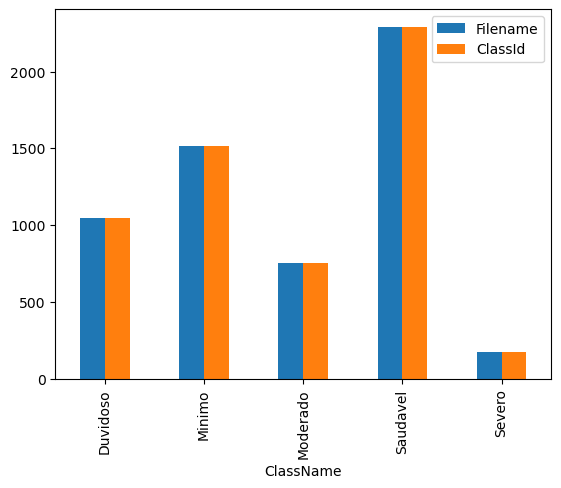

In [5]:
train_df.groupby('ClassName').count().plot.bar()

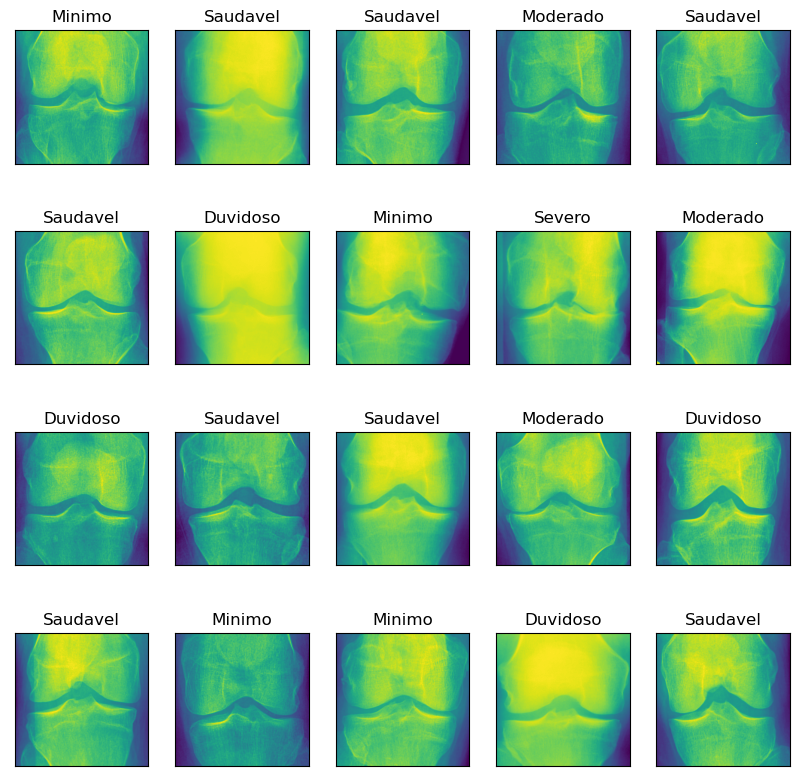

In [6]:
plot_df = train_df.sample(20).reset_index()
plt.figure(figsize=(10, 10))

for i in range(20):
    img_name = plot_df.loc[i, 'Filename']
    label_id = plot_df.loc[i, 'ClassId']
    label_name = plot_df.loc[i, 'ClassName']
    plt.subplot(4,5,i+1)
    plt.imshow(plt.imread(train_path + os.sep + str(label_id) + os.sep + img_name))
    plt.title(label_name)
    plt.xticks([])
    plt.yticks([])

## Análise Validation Set

In [7]:
val_image_names = glob.glob(val_path + '/*/*.png')
print("Total number of validation images: ", len(val_image_names))
val_image_names = pd.Series(val_image_names)

# val_df: a dataframe with 2 field: Filename, ClassId
val_df = pd.DataFrame()

# generate Filename field
val_df['Filename'] = val_image_names.map(lambda img_name: img_name.split(os.sep)[-1])

# generate ClassId field
val_df['ClassId'] = val_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

val_df['ClassName'] = val_df.apply(lambda row: findClassName(row), axis=1)

val_df.groupby('ClassName').count()

Total number of validation images:  826


,Filename,ClassId
ClassName,,
Duvidoso,153,153
Minimo,212,212
Moderado,106,106
Saudavel,328,328
Severo,27,27


<AxesSubplot:xlabel='ClassName'>

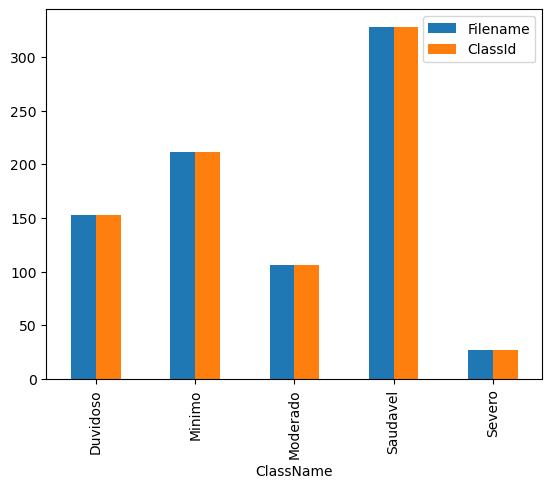

In [8]:
val_df.groupby(['ClassName']).count().plot.bar()

## Análise Test Set

In [9]:
test_image_names = glob.glob(test_path + '/*/*.png')
print("Total number of test images: ", len(test_image_names))
test_image_names = pd.Series(test_image_names)

# test_df: a dataframe with 2 field: Filename, ClassId
test_df = pd.DataFrame()

# generate Filename field
test_df['Filename'] = test_image_names.map(lambda img_name: img_name.split(os.sep)[-1])

# generate ClassId field
test_df['ClassId'] = test_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

test_df['ClassName'] = test_df.apply(lambda row: findClassName(row), axis=1)
test_df.groupby('ClassName').count()

Total number of test images:  1656


,Filename,ClassId
ClassName,,
Duvidoso,296,296
Minimo,447,447
Moderado,223,223
Saudavel,639,639
Severo,51,51


<AxesSubplot:xlabel='ClassName'>

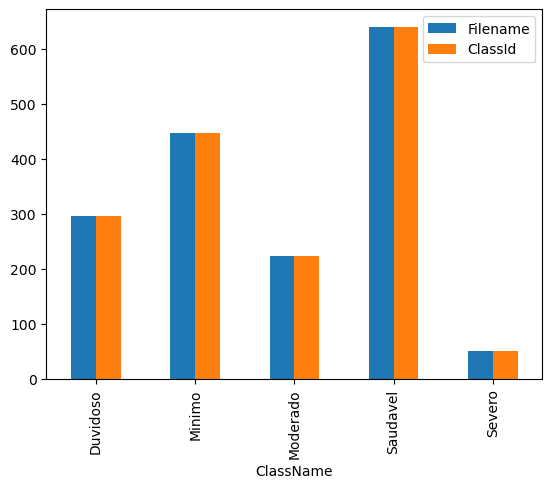

In [10]:
test_df.groupby(['ClassName']).count().plot.bar()

## Carregamento dos Dados

In [11]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from random import seed, sample
seed(42)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #zoom_range=0.2,         # transformação 2: zoom na imagem
    #vertical_flip=True,     # transformação 2: zoom na imagem
    #horizontal_flip=True,   # transformação 3: espelhamento
    rescale = 1./255
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #rotation_range=45,
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

validation_generator = train_datagen.flow_from_directory(
        val_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)


Found 5781 images belonging to 5 classes.
Found 826 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.


## Análise dos Peso das Classes

In [12]:
#
# Balanceamento das classes
#
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight( 'balanced', classes=np.unique(train_generator.classes),  y=train_generator.classes)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

{0: 0.5051114023591088, 1: 1.1053537284894837, 2: 0.762664907651715, 3: 1.5273447820343462, 4: 6.683236994219653}


## Treinamento Modelo Baseline

## Data Augmentation

## Grid de Hyper Parameteros

## Treinamento Modelo 1

## Treinamento Modelo 2

## etc...